In [ ]:
# import the libraries I will need 
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.callbacks import EarlyStopping

In [ ]:
# import the image dataset to be used 
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()
print(f"""the size of train images{train_images.shape},
the size of the labels{train_labels.shape},
the size of test images{test_images.shape},
the size of test_labels{test_labels.shape}""")

4423680/4422102 [==============================] - 0s 0us/step
the size of train images(60000, 28, 28),
the size of the labels(60000,),
the size of test images(10000, 28, 28),
the size of test_labels(10000,)


In [ ]:
train_labels[1:9] # so the labels are just some 0-9 digits representing labels 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# we store them here for later reference 

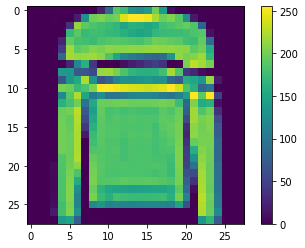

In [ ]:
plt.imshow(train_images[5])
plt.colorbar()

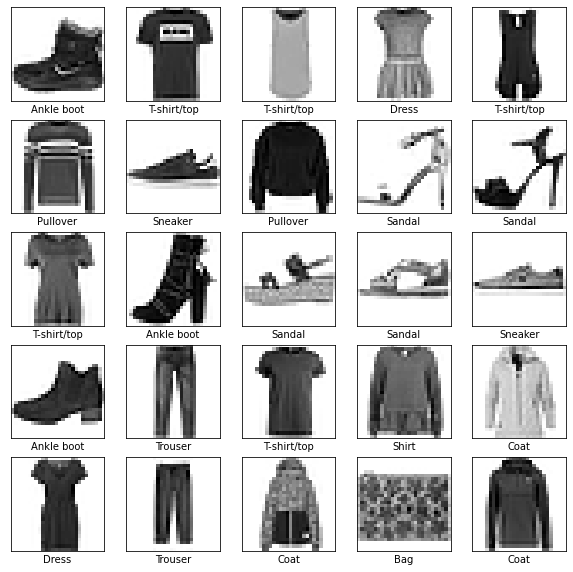

In [ ]:
# before traiing a neural network it is good to scale the images between 0-1 
train_images=train_images/255.0
test_images=test_images/255.0
# then we verify that the data is correct 
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
## we now build the model by adding layers 
model=Sequential([Flatten(input_shape=(28,28)),# transforms the format of the images from a two-dimensional array (of 28 by 28 pixels)
# to a one-dimensional array (of 28 * 28 = 784 pixels).
                  Dense(1000,activation='sigmoid'),
                  Dense(500,activation='relu'),
                  Dense(100,activation='relu'),
                  Dense(20,activation='relu'),
                  Dense(10)])## this represents the output classses present in the data 



In [ ]:
# then we compile the model 
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# after compiling is to fit the model here it learns to associate the images with labels 
stopper=keras.callbacks.EarlyStopping(patience=3) #after 3 non significant improvements we want to stop the model 
model.fit(train_images,train_labels,epochs=20,
          validation_split=0.3,# we want to do cross validation of sorts 
          callbacks=stopper)
# for these many epochs we need an early stopping 


Epoch 1/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1968 - accuracy: 0.9249 - val_loss: 0.2226 - val_accuracy: 0.9175
Epoch 2/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1909 - accuracy: 0.9274 - val_loss: 0.2146 - val_accuracy: 0.9195
Epoch 3/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1854 - accuracy: 0.9301 - val_loss: 0.2109 - val_accuracy: 0.9222
Epoch 4/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1752 - accuracy: 0.9338 - val_loss: 0.2137 - val_accuracy: 0.9210
Epoch 5/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1701 - accuracy: 0.9358 - val_loss: 0.2048 - val_accuracy: 0.9237
Epoch 6/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1636 - accuracy: 0.9381 - val_loss: 0.2119 - val_accuracy: 0.9236
Epoch 7/20
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1547 - accuracy: 0.9407 - val_loss: 0.2246 - val_accuracy:

In [ ]:

# then we evaluate it on the testing set 
test_loss,test_accuracy=model.evaluate(test_images,test_labels,verbose=1)


313/313 [==============================] - 1s 2ms/step - loss: 0.3942 - accuracy: 0.8875


In [ ]:
# we then attach a softmax layer to convert the logits to probabilities 
prob_model=Sequential([model,
                       keras.layers.Softmax()])
predictions=prob_model.predict(test_images)
predictions[9]

array([2.8327765e-08, 2.6346061e-09, 1.5193198e-14, 9.9931396e-11,
       8.7091973e-21, 3.6368903e-09, 1.2034679e-11, 9.9999976e-01,
       4.9334180e-13, 1.9411220e-07], dtype=float32)

In [ ]:
a=np.argmax(predictions[700])# this is the label for which the model is most certain that the prediction is 
# and we can examine this label 
print(f'the class label for the prediction is {class_names[a]}, and the correct label is {class_names[test_labels[700]]}')

the class label for the prediction is Bag, and the correct label is Bag


In [ ]:
# we now can use the model to make a single prediction for an image then examine this 

8

### TEXT CLASSFIFICATION WITH TENSORFLOW


In [ ]:
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
#load the datasets for setiment classficcation 
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1.tar.gz", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

84131840/84125825 [==============================] - 2s 0us/step


In [ ]:
os.listdir(dataset_dir)
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['unsup',
 'pos',
 'urls_unsup.txt',
 'urls_neg.txt',
 'labeledBow.feat',
 'unsupBow.feat',
 'neg',
 'urls_pos.txt']

In [ ]:
# a sample review 
sample_file = os.path.join(train_dir, 'pos/1156_9.txt')
with open(sample_file) as f:
  print(f.read())

Years ago I did follow a soap on TV. So I was curious about this movie, and I was so rewarded for finding it. It's a marvelous spoof of soaps, with jealousies, the usual actors' insecurities, and all sorts of lovely excesses. But more than anything - an amazing cast and an incredible script. How did someone get all those top-notch actors to play in such a silly sort of movie? And how did this little movie get writers to write the perfect lines? I never hear anyone talk about this movie or even admit hearing of it, but it's marvelous and I highly recommend seeing it. Sometimes I'll throw it on while doing housecleaning, and end up sitting on the couch, watching, laughing and thoroughly enjoying the whole wonderful thing. Many congrats to all who made it.


In [ ]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

In [ ]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='training', 
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [ ]:
## workinf with tf.data 
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(4):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label 0
Review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

In [ ]:
print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])

Label 0 corresponds to neg
Label 1 corresponds to pos


In [ ]:
raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [ ]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')
max_features = 10000
sequence_length = 250

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [ ]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [ ]:
# retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'Silent Night, Deadly Night 5 is the very last of the series, and like part 4, it\'s unrelated to the first three except by title and the fact that it\'s a Christmas-themed horror flick.<br /><br />Except to the oblivious, there\'s some obvious things going on here...Mickey Rooney plays a toymaker named Joe Petto and his creepy son\'s name is Pino. Ring a bell, anyone? Now, a little boy named Derek heard a knock at the door one evening, and opened it to find a present on the doorstep for him. Even though it said "don\'t open till Christmas", he begins to open it anyway but is stopped by his dad, who scolds him and sends him to bed, and opens the gift himself. Inside is a little red ball that sprouts Santa arms and a head, and proceeds to kill dad. Oops, maybe he should have left well-enough alone. Of course Derek is then traumatized by the incident since he watched it from the stairs, but he doesn\'t grow up to be some killer Santa, he just stops talking.<br /><br />T

In [ ]:
print("1287 ---> ",vectorize_layer.get_vocabulary()[1287])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  silent
 313 --->  night
Vocabulary size: 10000


In [ ]:
raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/test', 
    batch_size=batch_size)

Found 25000 files belonging to 2 classes.


In [ ]:
## applying the text vectorizaation layer to the data set 
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Training the neural network model 


In [ ]:
embedding_dim = 16
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160016    
_________________________________________________________________
dropout (Dropout)            (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss=losses.BinaryCrossentropy(from_logits=True), 
              optimizer='adam', metrics=tf.metrics.BinaryAccuracy(threshold=0.0))


In [ ]:
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=stopper)

Epoch 1/20
625/625 [==============================] - 10s 17ms/step - loss: 0.6665 - binary_accuracy: 0.6852 - val_loss: 0.6186 - val_binary_accuracy: 0.7722
Epoch 2/20
625/625 [==============================] - 4s 6ms/step - loss: 0.5529 - binary_accuracy: 0.7975 - val_loss: 0.5014 - val_binary_accuracy: 0.8202
Epoch 3/20
625/625 [==============================] - 4s 6ms/step - loss: 0.4481 - binary_accuracy: 0.8422 - val_loss: 0.4223 - val_binary_accuracy: 0.8462
Epoch 4/20
625/625 [==============================] - 4s 6ms/step - loss: 0.3808 - binary_accuracy: 0.8662 - val_loss: 0.3749 - val_binary_accuracy: 0.8612
Epoch 5/20
625/625 [==============================] - 4s 6ms/step - loss: 0.3371 - binary_accuracy: 0.8776 - val_loss: 0.3458 - val_binary_accuracy: 0.8684
Epoch 6/20
625/625 [==============================] - 4s 6ms/step - loss: 0.3070 - binary_accuracy: 0.8870 - val_loss: 0.3265 - val_binary_accuracy: 0.8722
Epoch 7/20
625/625 [==============================] - 4s 6ms/s

In [ ]:
# then we evaluate the model 
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 8s 11ms/step - loss: 0.3185 - binary_accuracy: 0.8711
Loss:  0.31846606731414795
Accuracy:  0.8710799813270569


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

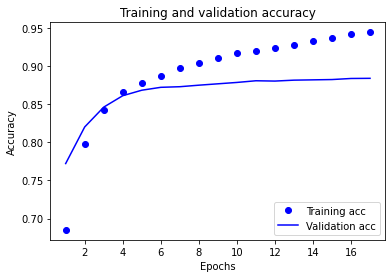

In [ ]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

## the exercise to classify stack overflow texts 


In [ ]:
url = "http://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz"

dataset = tf.keras.utils.get_file("stack_overflow_16k.tar.gz", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset),'stack_overflow')

In [ ]:
batch_size = 32

raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'train', batch_size=batch_size, validation_split=0.2, subset='training', seed=42)

raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'train', batch_size=batch_size, validation_split=0.2, subset='validation', seed=42)

raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'test', batch_size=batch_size)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.
Found 8000 files belonging to 4 classes.
Using 1600 files for validation.
Found 8000 files belonging to 4 classes.


In [ ]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b'"my tester is going to the wrong constructor i am new to programming so if i ask a question that can be easily fixed, please forgive me. my program has a tester class with a main. when i send that to my regularpolygon class, it sends it to the wrong constructor. i have two constructors. 1 without perameters..public regularpolygon().    {.       mynumsides = 5;.       mysidelength = 30;.    }//end default constructor...and my second, with perameters. ..public regularpolygon(int numsides, double sidelength).    {.        mynumsides = numsides;.        mysidelength = sidelength;.    }// end constructor...in my tester class i have these two lines:..regularpolygon shape = new regularpolygon(numsides, sidelength);.        shape.menu();...numsides and sidelength were declared and initialized earlier in the testing class...so what i want to happen, is the tester class sends numsides and sidelength to the second constructor and use it in that class. but it only uses the default constru

In [ ]:
print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])
print("Label 2 corresponds to", raw_train_ds.class_names[2])
print("Label 3 corresponds to", raw_train_ds.class_names[3])

Label 0 corresponds to csharp
Label 1 corresponds to java
Label 2 corresponds to javascript
Label 3 corresponds to python


In [ ]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [ ]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [ ]:
# retrieve a batch (of 32 questions and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_question, first_label = text_batch[0], label_batch[0]
print("Review", first_question)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_question, first_label))

Review tf.Tensor(b'"unit testing of setters and getters teacher wanted us to do a comprehensive unit test. for me, this will be the first time that i use junit. i am confused about testing set and get methods. do you think should i test them? if the answer is yes; is this code enough for testing?..  public void testsetandget(){.    int a = 10;.    class firstclass = new class();.    firstclass.setvalue(10);.    int value = firstclass.getvalue();.    assert.asserttrue(""error"", value==a);.  }...in my code, i think if there is an error, we can\'t know that the error is deriving because of setter or getter."\n', shape=(), dtype=string)
Label java
Vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[1011,  773,    9, 2456,    8, 1863, 2362,  690, 1267,    4,   40,
           5,    1, 1011,  196,   12,   74,   13,   72,   33,    2,   98,
         105,   14,    3,   70, 9611,    3,   34,  888,  202,  773,  107,
           8,   41,  242,   40,   58,  291,   90,    3,  1

In [ ]:
print("1187 ---> ",vectorize_layer.get_vocabulary()[1187])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1187 --->  enough
 313 --->  source
Vocabulary size: 10000


In [ ]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

### modelling 

In [ ]:
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1,15),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(4)])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 15)          150015    
_________________________________________________________________
dropout_8 (Dropout)          (None, None, 15)          0         
_________________________________________________________________
global_average_pooling1d_4 ( (None, 15)                0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 64        
Total params: 150,079
Trainable params: 150,079
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss=losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer='adamax', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=stopper)

Epoch 1/20
200/200 [==============================] - 1s 5ms/step - loss: 0.5452 - accuracy: 0.8481 - val_loss: 0.6161 - val_accuracy: 0.7969
Epoch 2/20
200/200 [==============================] - 1s 4ms/step - loss: 0.5392 - accuracy: 0.8525 - val_loss: 0.6110 - val_accuracy: 0.7994
Epoch 3/20
200/200 [==============================] - 1s 4ms/step - loss: 0.5341 - accuracy: 0.8511 - val_loss: 0.6067 - val_accuracy: 0.7981
Epoch 4/20
200/200 [==============================] - 1s 4ms/step - loss: 0.5316 - accuracy: 0.8508 - val_loss: 0.6021 - val_accuracy: 0.7994
Epoch 5/20
200/200 [==============================] - 1s 4ms/step - loss: 0.5234 - accuracy: 0.8556 - val_loss: 0.5981 - val_accuracy: 0.7994
Epoch 6/20
200/200 [==============================] - 1s 4ms/step - loss: 0.5205 - accuracy: 0.8558 - val_loss: 0.5940 - val_accuracy: 0.7987
Epoch 7/20
200/200 [==============================] - 1s 4ms/step - loss: 0.5137 - accuracy: 0.8542 - val_loss: 0.5907 - val_accuracy: 0.7994
Epoch 

In [ ]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

250/250 [==============================] - 0s 2ms/step - loss: 0.6023 - accuracy: 0.7859
Loss:  0.6023187637329102
Accuracy:  0.7858750224113464
